In [185]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from subprocess import check_output

In [187]:
CO2_df = pd.read_csv('./data/archive.csv')
temp_by_city = pd.read_csv('./data/ClimateChange/GlobalLandTemperaturesByCity.csv')
temp_by_country = pd.read_csv('./data/ClimateChange/TemperaturesByCountry.csv')
temp_by_major_city = pd.read_csv('./data/ClimateChange/TemperaturesByMajorCity.csv')
temp_by_state = pd.read_csv('./data/ClimateChange/TemperaturesByState.csv')
global_temp = pd.read_csv('./data/ClimateChange/GlobalTemperatures.csv')

In [189]:
CO2_df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [191]:
temp_by_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [193]:
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [195]:
temp_by_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [197]:
temp_by_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [199]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
# Dropping all NaN values 
CO2_df = CO2_df.dropna()
temp_by_city = temp_by_city.dropna()
temp_by_country = temp_by_country.dropna()
temp_by_major_city = temp_by_major_city.dropna()
temp_by_state = temp_by_state.dropna()
global_temp = global_temp.dropna()

In [203]:
# Modify the date format so I could only use the year
def to_year(date):
    """
    returns year from date time
    """
    for i in [date]:
        first = i.split('-')[0]
        return int(first)
 
    
# Applying the date modification and creating a new column 
# in the dataset called year
temp_by_state['year'] = temp_by_state['dt'].apply(to_year)

# Collecting only data of the United States
dfs = temp_by_state[temp_by_state['Country'] == 'United States']

# Collecting the average temperature per year 
dfa = pd.DataFrame()
years = dfs['year'].unique()
for i in years:
    df_avg = dfs[dfs['year'] == i]['AverageTemperature'].mean()
    df_new = (dfs[dfs['year'] == i]).head(1)
    df_new['AverageTemperature'] = df_avg
    dfa = pd.concat([dfa, df_new], ignore_index=True)

<Axes: xlabel='year', ylabel='AverageTemperature'>

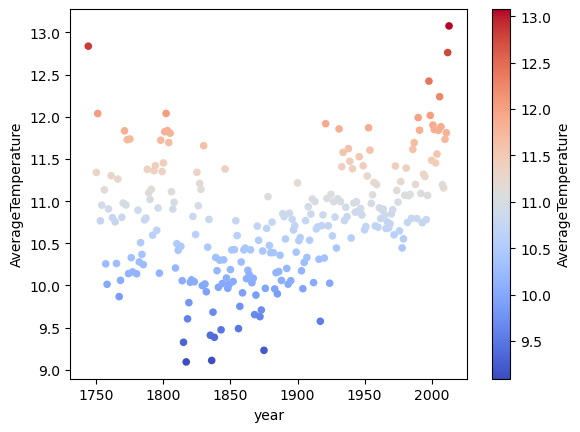

In [205]:
# Average Temperature above 9 degrees
df_nine = dfa[dfa['AverageTemperature'] >= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')

The x-axis represents the years.
The y-axis represents the average temperature.
The color of the dots indicates the temperature values, with blue representing lower temperatures and red representing higher temperatures.
There is a visible trend of increasing average temperatures over time, particularly in the most recent years.

<Axes: xlabel='year', ylabel='AverageTemperature'>

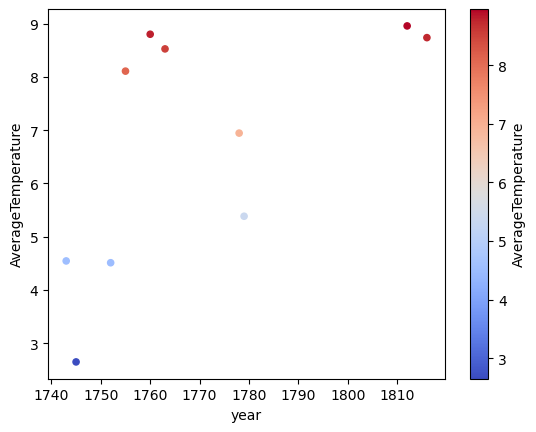

In [207]:
# Average Temperature below 9 degrees
df_nine = dfa[dfa['AverageTemperature'] <= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')

The x-axis represents the years from 1740 to 1820.
The y-axis represents the average temperature.
Similar to the previous chart, blue represents lower temperatures and red represents higher temperatures.
The temperatures vary over this time period, with some years showing relatively higher temperatures and others showing lower.

In [209]:
new_co2_df = CO2_df

In [215]:
import pandas as pd

dfc = pd.DataFrame()

# Collecting all of the unique years
years = CO2_df['Year'].unique()

for i in years:
    df_avg = CO2_df[CO2_df['Year'] == i]['Carbon Dioxide (ppm)'].mean()
    df_new = CO2_df[CO2_df['Year'] == i].head(1).copy()
    df_new['Carbon Dioxide (ppm)'] = df_avg
    dfc = pd.concat([dfc, df_new], ignore_index=True)

# Changing the Year column to year (lowercase)
dfc.rename(columns={"Year": "year"}, inplace=True)

# Dropping all of the unwanted columns
dfc.drop(['Seasonally Adjusted CO2 (ppm)', 
           'Carbon Dioxide Fit (ppm)', 
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

print(dfc)


    year  Carbon Dioxide (ppm)
0   1958            315.330000
1   1959            315.981667
2   1960            316.908333
3   1961            317.645000
4   1962            318.453333
5   1963            318.992500
6   1964            319.202222
7   1965            320.035833
8   1966            321.370000
9   1967            322.180000
10  1968            323.049167
11  1969            324.621667
12  1970            325.683333
13  1971            326.319167
14  1972            327.457500
15  1973            329.677500
16  1974            330.244167
17  1975            331.152500
18  1976            332.152500
19  1977            333.900833
20  1978            335.504167
21  1979            336.850833
22  1980            338.685000
23  1981            339.934167
24  1982            341.131667
25  1983            342.781667
26  1984            344.422500
27  1985            345.904167
28  1986            347.152500
29  1987            348.932500
30  1988            351.484167
31  1989

In [211]:
print(CO2_df.columns)

Index(['Year', 'Month', 'Decimal Date', 'Carbon Dioxide (ppm)',
       'Seasonally Adjusted CO2 (ppm)', 'Carbon Dioxide Fit (ppm)',
       'Seasonally Adjusted CO2 Fit (ppm)'],
      dtype='object')


In [217]:
import pandas as pd

# Assuming CO2_df is your DataFrame and it contains a column 'Year'
years = CO2_df['Year'].unique()
dfc = pd.DataFrame()

for i in years:
    df_avg = CO2_df[CO2_df['Year'] == i]['Carbon Dioxide (ppm)'].mean()
    df_new = CO2_df[CO2_df['Year'] == i].head(1).copy()
    df_new['Carbon Dioxide (ppm)'] = df_avg
    dfc = pd.concat([dfc, df_new], ignore_index=True)

# Changing the Year column to year (lowercase)
dfc.rename(columns={"Year": "year"}, inplace=True)

# Dropping all of the unwanted columns
dfc.drop(['Seasonally Adjusted CO2 (ppm)', 
           'Carbon Dioxide Fit (ppm)', 
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)


In [219]:
dfc = dfc.dropna()

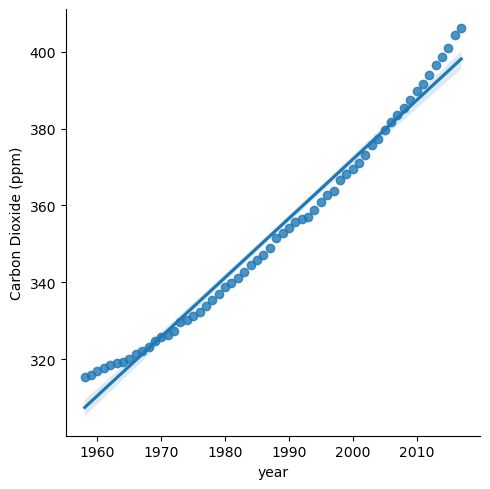

In [221]:
sns.lmplot(x='year', y='Carbon Dioxide (ppm)', data=dfc)

The x-axis represents the years from 1960 to 2010.
The y-axis represents the CO2 concentration in parts per million (ppm).
The CO2 levels show a consistent increase over the years, with a steep upward trend.

<Axes: >

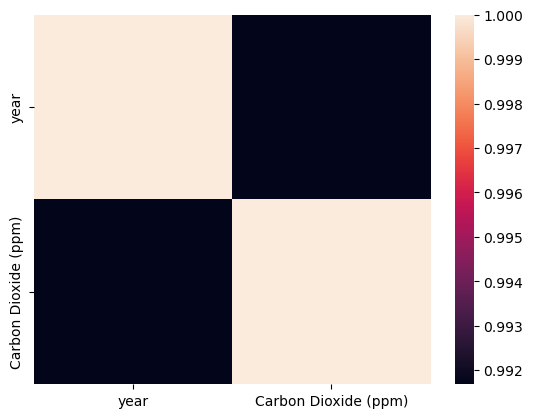

In [223]:
sns.heatmap(dfc.corr())

The x-axis represents the year.
The y-axis represents the CO2 concentration in ppm.
The color scale indicates the correlation values, with dark colors representing higher correlations.
There is a very high correlation between the year and CO2 levels, indicating that as time progresses, the CO2 levels increase.

<Axes: >

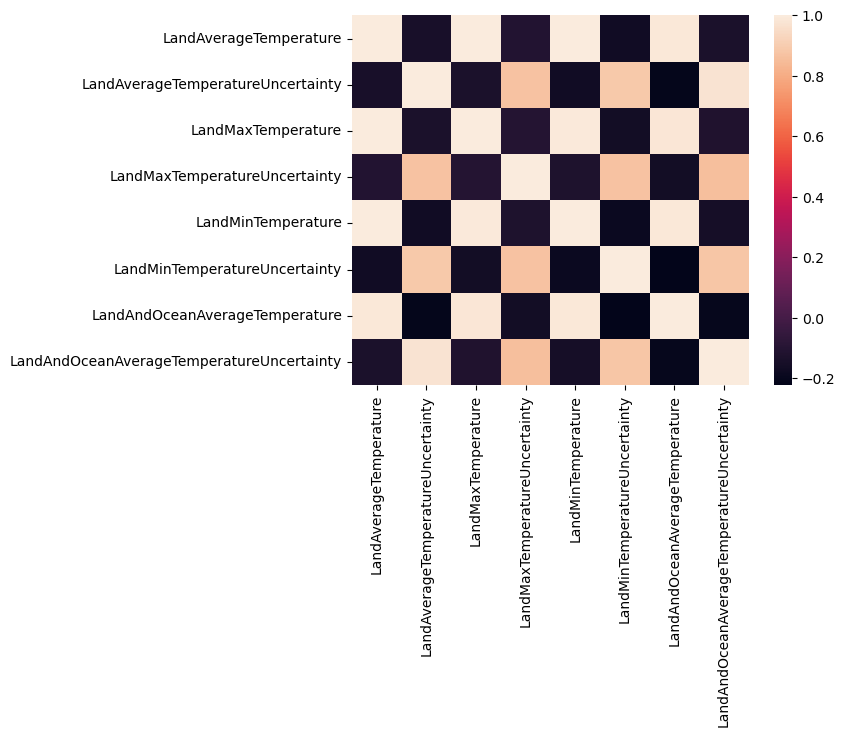

In [225]:
#sns.heatmap(global_temp.corr())

import seaborn as sns
import pandas as pd


# Select only numeric columns
numeric_cols = global_temp.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
sns.heatmap(corr_matrix)


<Axes: >

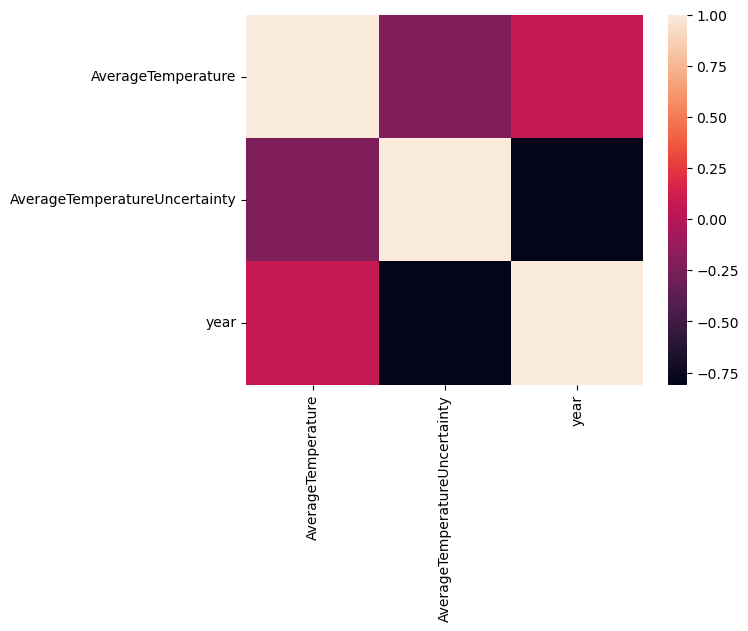

In [227]:
import seaborn as sns
import pandas as pd

# Assuming temp_by_state is your DataFrame
# Select only numeric columns
numeric_cols = temp_by_state.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
sns.heatmap(corr_matrix)


Strong positive correlations (near 1.0) are evident among similar types of temperature measurements and their uncertainties.
For example, LandAverageTemperature is strongly correlated with LandMaxTemperature and LandMinTemperature.
The uncertainty measures (e.g., LandAverageTemperatureUncertainty) do not exhibit strong correlations with actual temperature measures, as expected, since uncertainties should be less dependent on the measurements themselves.

<Axes: >

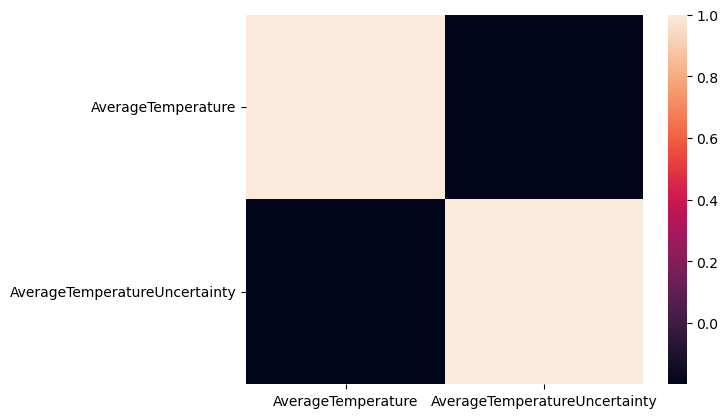

In [229]:

import seaborn as sns
import pandas as pd

# Assuming temp_by_major_city is your DataFrame
# Select only numeric columns
numeric_cols = temp_by_major_city.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
sns.heatmap(corr_matrix)


The correlation between AverageTemperature and AverageTemperatureUncertainty is very low, indicating that the average temperature does not predict its uncertainty.
This implies that variations in temperature are measured independently of how uncertain those measurements might be

<Axes: >

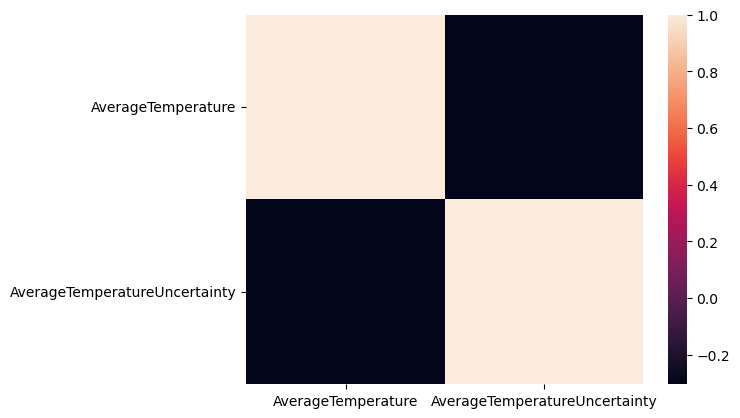

In [231]:

import seaborn as sns
import pandas as pd

# Assuming temp_by_country is your DataFrame
# Select only numeric columns
numeric_cols = temp_by_country.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
sns.heatmap(corr_matrix)


In [233]:
CO2_df.rename(index=str, columns={"Year": "year"}, inplace=True)

In [235]:
dfsc = pd.merge(dfa, CO2_df, on=['year']).dropna()

dfsc.drop(['Seasonally Adjusted CO2 (ppm)', 
           'Carbon Dioxide Fit (ppm)', 
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

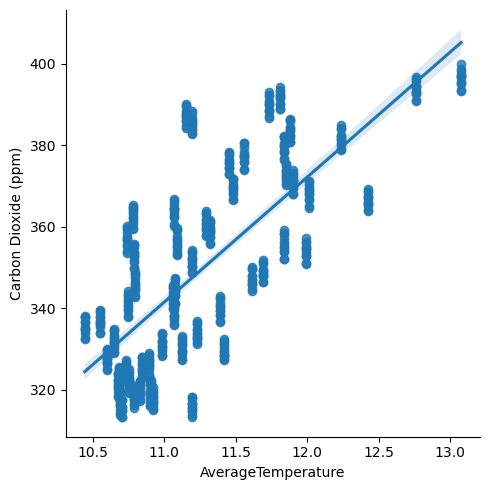

In [237]:
sns.lmplot(x='AverageTemperature', y='Carbon Dioxide (ppm)', data = dfsc)

There is a positive linear relationship between AverageTemperature and Carbon Dioxide levels.
As AverageTemperature increases, CO₂ levels also tend to increase.
This supports the hypothesis that higher temperatures are associated with higher concentrations of CO₂ in the atmosphere, consistent with the greenhouse effect.

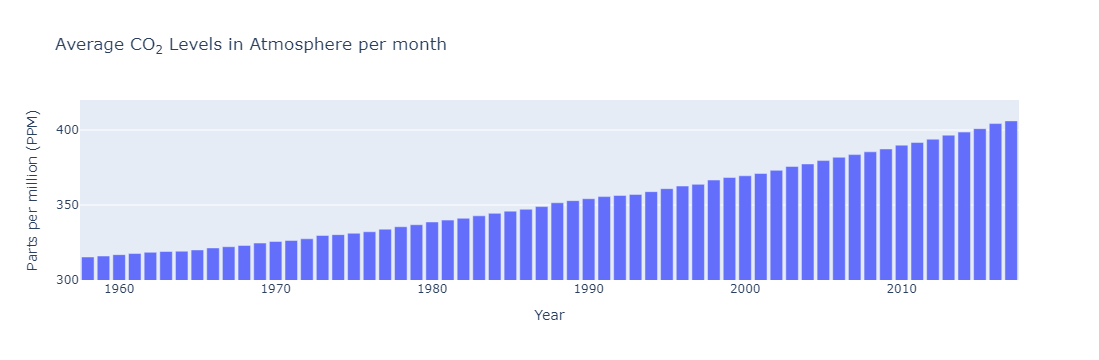

In [239]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

grp1 = CO2_df.groupby(["year"]).mean()["Carbon Dioxide (ppm)"]
trace1 = go.Bar(x=grp1.index, y=grp1.values)
layout = go.Layout(
    title="Average CO<sub>2</sub> Levels in Atmosphere per month",
    yaxis=dict(title="Parts per million (PPM)", range=(300,420)),
    xaxis=dict(title="Year"))
figure = go.Figure(data=[trace1], layout=layout)
py.iplot(figure, filename="co2-ppm-year")

As the average temperature increases, the CO2 levels also tend to increase.
This suggests that higher temperatures might be associated with higher CO2 concentrations, potentially due to increased emissions from various sources.


In [241]:
group2 = CO2_df.groupby(["year", "Month"]).mean()["Carbon Dioxide (ppm)"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in group2.index]

# Mean values.
y1 = group2.values

# Rolling window average
y2 = group2.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
y3 = group2.ewm(span=3, min_periods=1).mean().values

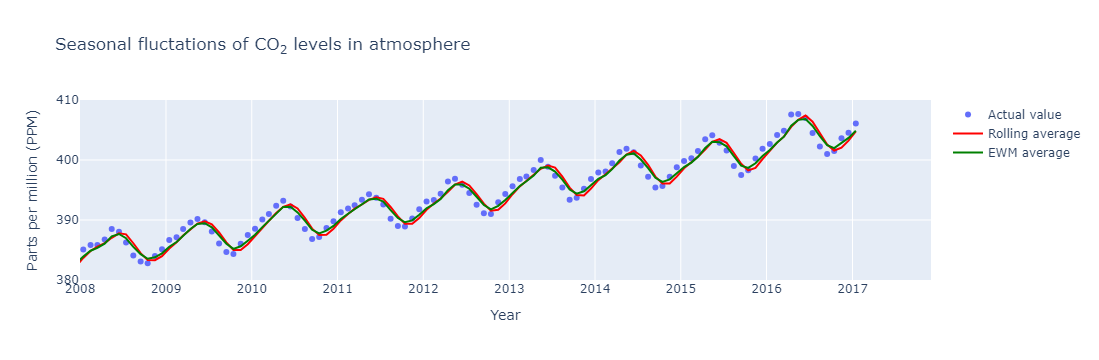

In [243]:
second_trace = go.Scatter(x=x, y=y1, mode="markers", name="Actual value")
third_trace = go.Scatter(x=x, y=y2, line=dict(color="red"), name="Rolling average")
forth_trace = go.Scatter(x=x, y=y3, line=dict(color="green"), name="EWM average")

default_period = (dt.datetime(2008, 1, 1), dt.datetime(2017,12,1))
default_ppm_range = (380, 410)
layout = go.Layout(
    title="Seasonal fluctations of CO<sub>2</sub> levels in atmosphere",
    yaxis=dict(title="Parts per million (PPM)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period))

figure = go.Figure(data=[second_trace, third_trace, forth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-seasonal")

The chart reveals a cyclical pattern in CO2 levels, with regular peaks and troughs each year.
This seasonality is likely due to natural processes such as plant growth and decay cycles.
Despite the seasonal fluctuations, the overall trend shows an increase in CO2 levels over time.

In [245]:
from sklearn import linear_model
from sklearn.model_selection  import train_test_split

x_val = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_val = [ i for i in y1 ] 

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_val)

Accuracy:  0.996044541845828


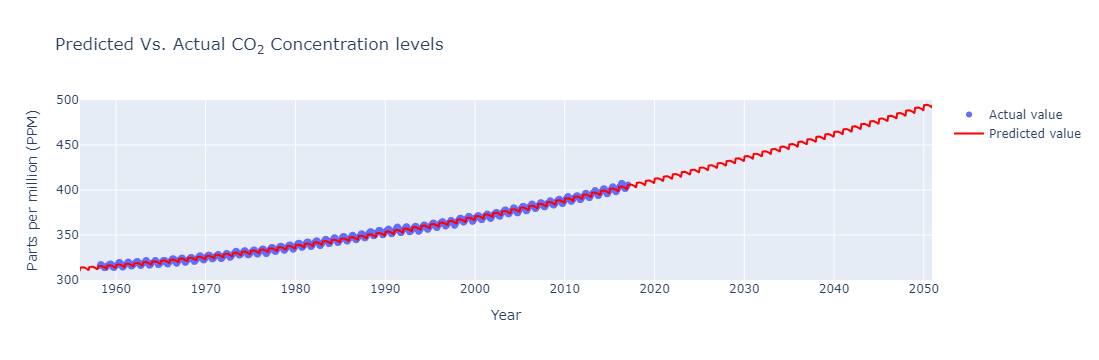

In [247]:
# Defining timeline of years
predicted_years = range(1950, 2055)
predicted_months = range(1, 13)

predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        predicted_x.append([y, j, j ** 2, y ** 2])
        
# Predict values
predicted_y = linearModel.predict(predicted_x)


x_plot = [dt.datetime(i[0], i[1], 15) for i in predicted_x]
fifth_trace = go.Scatter(x=x_plot, y=predicted_y, line=dict(color="red"), name="Predicted value")

period_default = dt.datetime(1956, 1, 1), dt.datetime(2050,12,1)
ppm_range_def = (300, 500)
layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_trace, fifth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")

The predicted values closely follow the actual values, indicating that the model is performing well.
The model predicts a continued increase in CO2 levels into the future, which aligns with historical trends.
If the current trend continues, CO2 levels are expected to reach significantly higher levels by 2050, which could have severe implications for the climate.

In [249]:
# State that had the highest average temperature level
temp_by_state.loc[temp_by_state['AverageTemperature'].idxmax()]

dt                               2012-06-01
AverageTemperature                   36.339
AverageTemperatureUncertainty         0.385
State                                 Delhi
Country                               India
year                                   2012
Name: 116037, dtype: object

In [251]:
# Country that had the highest Average Temperature
# Kuwait (Western Asia)
temp_by_country.loc[temp_by_country['AverageTemperature'].idxmax()]

dt                               2012-07-01
AverageTemperature                   38.842
AverageTemperatureUncertainty         0.464
Country                              Kuwait
Name: 284851, dtype: object

In [253]:
temp_by_state.loc[temp_by_state['AverageTemperatureUncertainty'].idxmax()]

dt                                1768-01-01
AverageTemperature                    -9.102
AverageTemperatureUncertainty         12.646
State                            Kaliningrad
Country                               Russia
year                                    1768
Name: 202908, dtype: object

In [255]:
def mod_year(date):
    """
    returns year from date time
    """
    for i in [date]:
        first = i.split('-')[0]
        return int(first)

In [257]:
def mod_month(date):
    """
    returns month from date time
    """
    for i in [date]:
        second = i.split('-')[1]
        return int(second)

In [265]:
temp_by_country['year'] = temp_by_country['dt'].apply(mod_year)
temp_by_country['month'] = temp_by_country['dt'].apply(mod_month)

In [267]:
country_new_temp_data = pd.merge(temp_by_country, CO2_df, on=['year'])

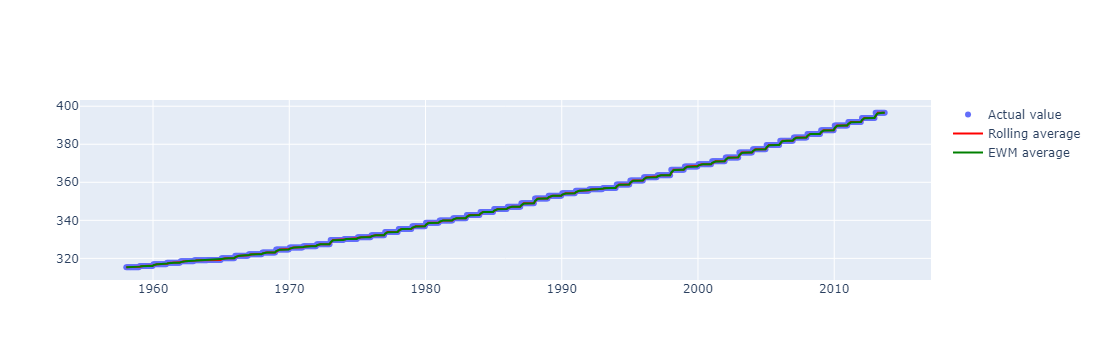

In [269]:
import pandas as pd
import datetime as dt
import plotly.graph_objs as go

# Ensure the 'Carbon Dioxide (ppm)' column is numeric
country_new_temp_data["Carbon Dioxide (ppm)"] = pd.to_numeric(country_new_temp_data["Carbon Dioxide (ppm)"], errors="coerce")

# Drop rows with NaN values in the 'Carbon Dioxide (ppm)' column
country_new_temp_data = country_new_temp_data.dropna(subset=["Carbon Dioxide (ppm)"])

# Select only numeric columns
numeric_data = country_new_temp_data.select_dtypes(include=[float, int])

# Include the 'year' and 'month' columns for grouping
numeric_data["year"] = country_new_temp_data["year"]
numeric_data["month"] = country_new_temp_data["month"]

# Group by year and month, then compute the mean
country_carbon = numeric_data.groupby(["year", "month"]).mean()["Carbon Dioxide (ppm)"]

# Create datetime objects for plotting
xx = [dt.datetime(year=i[0], month=i[1], day=15) for i in country_carbon.index]

# Mean values
yy1 = country_carbon.values

# Rolling window average
yy2 = country_carbon.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
yy3 = country_carbon.ewm(span=3, min_periods=1).mean().values

# Create traces for plotting
second_country_trace = go.Scatter(x=xx, y=yy1, mode="markers", name="Actual value")
third_country_trace = go.Scatter(x=xx, y=yy2, line=dict(color="red"), name="Rolling average")
forth_country_trace = go.Scatter(x=xx, y=yy3, line=dict(color="green"), name="EWM average")

# Combine traces into a figure
fig = go.Figure(data=[second_country_trace, third_country_trace, forth_country_trace])

# Display the figure
fig.show()



In [271]:
x_values = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_values = [ i for i in y1 ] 

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_values)

Accuracy:  0.996044541845828


In [273]:
# country_new_temp_data['Country'].unique()
df1 = country_new_temp_data.groupby(['Country'])

In [281]:
df2= df1.apply(lambda x: x.sort_values(["Carbon Dioxide (ppm)"]))
#df2 = df1.groupby(['Year', 'Month'], group_keys=False).apply(lambda x: x.sort_values("Carbon Dioxide (ppm)"))
#df2 = df1.groupby(['Year', 'Month'], group_keys=False).apply(lambda x: x.sort_values(by="Carbon Dioxide (ppm)"))



C:\Users\MrAk47724\AppData\Local\Temp\ipykernel_7820\3455390626.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [283]:
df3=df2.reset_index(drop=True)
df3.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958-10-01,13.910,0.320,Afghanistan,1958,10,9,1958.7068,313.21,316.06,312.48,315.35
1,1958-04-01,16.592,0.350,Afghanistan,1958,4,9,1958.7068,313.21,316.06,312.48,315.35
2,1958-06-01,25.091,0.502,Afghanistan,1958,6,9,1958.7068,313.21,316.06,312.48,315.35
3,1958-07-01,27.240,0.363,Afghanistan,1958,7,9,1958.7068,313.21,316.06,312.48,315.35
4,1958-08-01,24.639,0.436,Afghanistan,1958,8,9,1958.7068,313.21,316.06,312.48,315.35


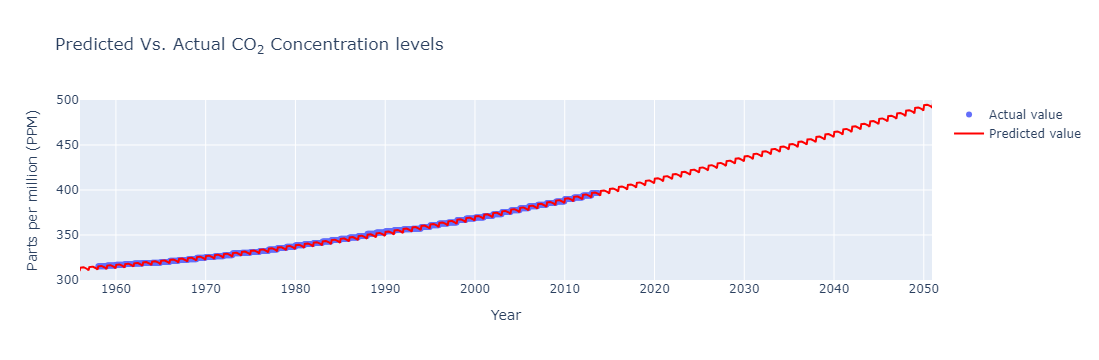

In [285]:
new_predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        new_predicted_x.append([y, j, j ** 2, y ** 2])
        
# Predict values
new_predicted_y = linearModel.predict(new_predicted_x)


new_x_plot = [dt.datetime(i[0], i[1], 15) for i in new_predicted_x]
fifth_new_trace = go.Scatter(x=new_x_plot , y=new_predicted_y, line=dict(color="red"), name="Predicted value")

layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_country_trace, fifth_new_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")